In [11]:
# Data Science Libraries
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

# Retrieve my zillow data
import wrangle

# Remove Pink Boxes from Screen
import warnings
warnings.filterwarnings("ignore")

# 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [12]:
# First I have to split the data. The scaling has to be fitted, which means I need my Train dataset
# Note: When scaling, fit on train and then apply to validate and test. 
# I will not be applying scaling to validate and test for these exercises since we won't see them, and to save time
train , validate, test = wrangle.wrangle_zillow()

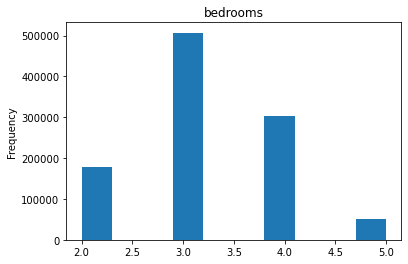

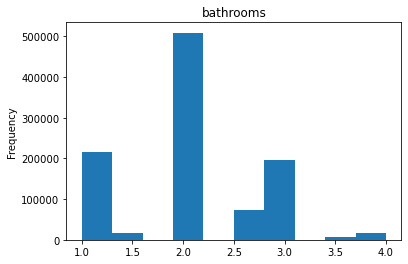

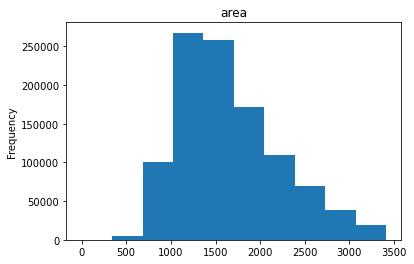

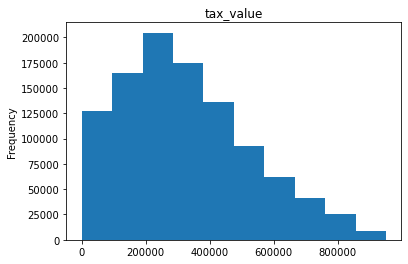

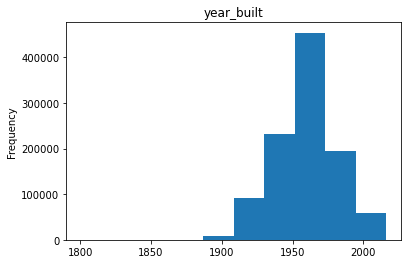

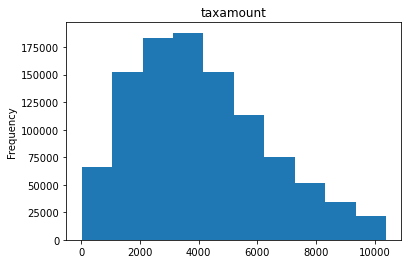

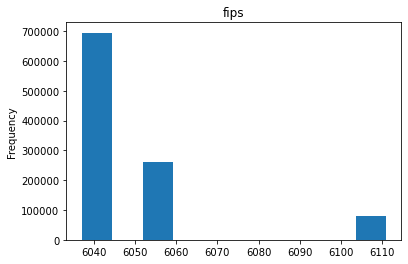

In [13]:
columns = train.columns 
for x in columns: 
    train[ x ].plot.hist(title= x)
    plt.show();

### Min-Max Scaler

In [15]:
# 1. Create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. Fit the object (learn the min and max value)
scaler.fit(train[['taxamount', 'tax_value']])

# 3. Use the object (use the min, max to do the transformation)
scaled_taxes = scaler.transform(train[['taxamount', 'tax_value']])

# 4. Create a dataframe from the scaled values
pd.DataFrame(scaled_taxes, index = train.index,
             columns = ['scaled_taxamount', 'scaled_tax_value'])

# 5. Assign the scaled values as new columns in the train
train[['scaled_taxamount', 'scaled_tax_value']] = scaled_taxes

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,scaled_taxamount,scaled_tax_value
1901200,2,2.0,1205.0,354670.0,1941,4395.55,6037,0.422635,0.372953
1786912,5,2.0,1586.0,192000.0,2004,3114.34,6037,0.298982,0.201887
930919,2,1.0,860.0,212332.0,1952,2692.90,6037,0.258308,0.223268
1805072,2,1.0,1125.0,628500.0,1948,8168.31,6037,0.786753,0.660917
1775847,3,2.5,1731.0,532000.0,2002,5724.10,6111,0.550856,0.559436


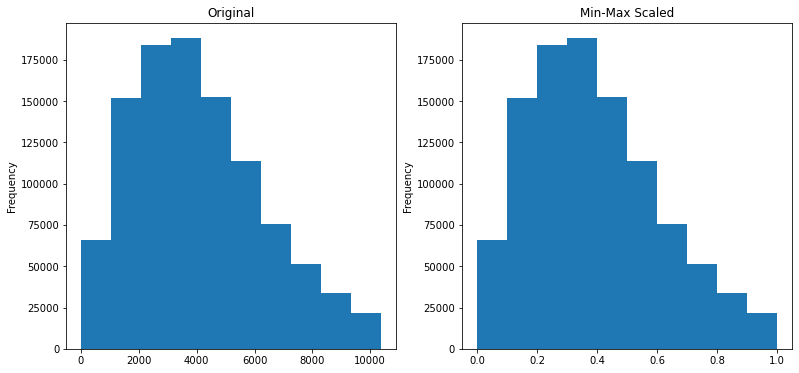

In [18]:
# Visualize the un-scaled and scaled distribution for taxamount
# Notice that the distribution remains the same, but the scale of the x axis has changed!
plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.taxamount.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.scaled_taxamount.plot.hist(title='Min-Max Scaled');

### Standard Scaler

In [19]:
# 1. Create the object
scaler = sklearn.preprocessing.StandardScaler()

# 2. Fit the object
scaler.fit(train[['taxamount']])

# 3. Use the object. Scale total_bill only
train['taxamount_scaled'] = scaler.transform(train[['taxamount']])


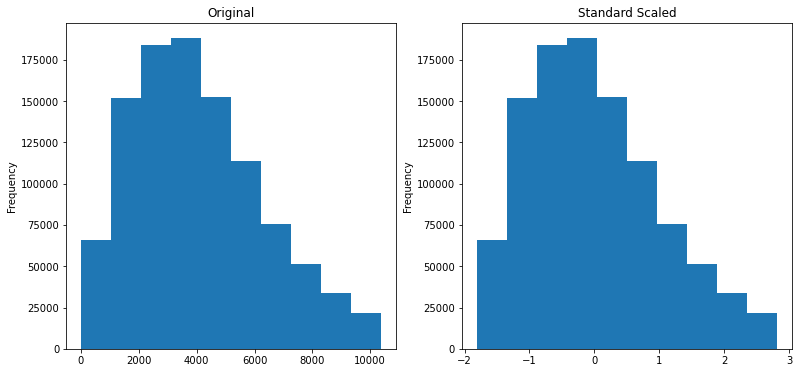

In [20]:
# Plotting the scaled and unscaled distributions
# Notice again that the distribution remains the same, but the x axis has been scaled differently
plt.figure(figsize=(13, 6))

plt.subplot(121)
train.taxamount.plot.hist(title='Original')

plt.subplot(122)
train.taxamount_scaled.plot.hist(title='Standard Scaled');

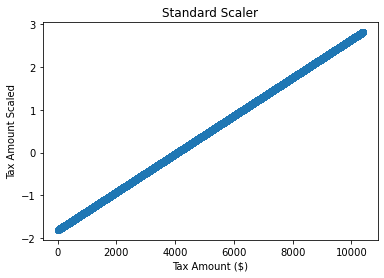

In [21]:
plt.scatter(train.taxamount, train.taxamount_scaled)
plt.xlabel('Tax Amount ($)')
plt.ylabel('Tax Amount Scaled')
plt.title('Standard Scaler');

### Robust Scaler

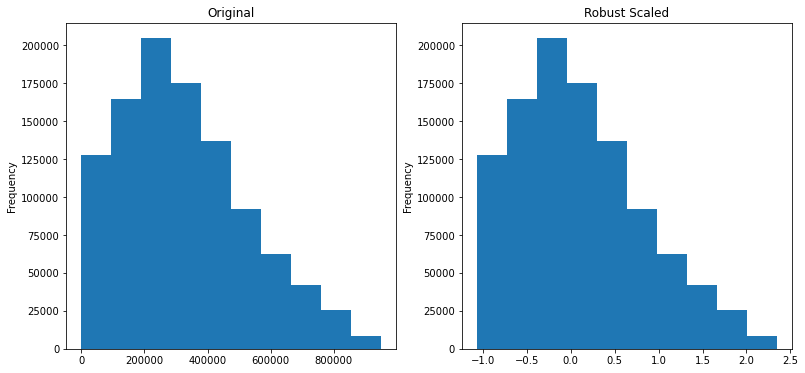

In [22]:
# 1. Create the object
scaler = sklearn.preprocessing.RobustScaler()

# 2. Fit the object
scaler.fit(train[['tax_value']])

# 3. Use the object 
train['tax_value_scaled'] = scaler.transform(train[['tax_value']])

# Plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Robust Scaled');

## Non-linear Scaler

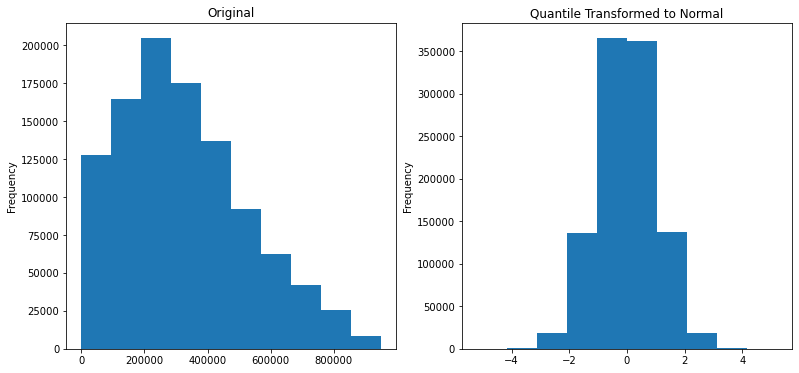

In [23]:
# 1. Create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. Fit the object
scaler.fit(train[['tax_value']])

# 3. Use the object
train['tax_value_scaled'] = scaler.transform(train[['tax_value']])


# Plot the scaled and unscaled distribution
# Oh wow! The distribution did NOT remain the same, and the scale of the x axis has changed as well.
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Quantile Transformed to Normal');

# 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [27]:
# Resetting my train by dropping the scaled columns
train = train[['bedrooms','bathrooms','area','tax_value','year_built','taxamount','fips']]
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1901200,2,2.0,1205.0,354670.0,1941,4395.55,6037
1786912,5,2.0,1586.0,192000.0,2004,3114.34,6037
930919,2,1.0,860.0,212332.0,1952,2692.90,6037
1805072,2,1.0,1125.0,628500.0,1948,8168.31,6037
1775847,3,2.5,1731.0,532000.0,2002,5724.10,6111


In [28]:
# Scaling with Min-Max Scaler
scaler = sklearn.preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(train[['taxamount', 'tax_value']])
scaled

array([[0.42263467, 0.37295329],
       [0.29898199, 0.20188702],
       [0.25830779, 0.22326846],
       ...,
       [0.68662511, 0.60765702],
       [0.39444243, 0.35246152],
       [0.39277759, 0.35025628]])

In [29]:
# Turning the scaled data into a new dataframe
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['taxamount', 'tax_value'])
scaled_df.head()

,taxamount,tax_value
1901200,0.422635,0.372953
1786912,0.298982,0.201887
930919,0.258308,0.223268
1805072,0.786753,0.660917
1775847,0.550856,0.559436


In [30]:
# Using the inverse function
scaler.inverse_transform(scaled_df)

array([[  4395.55, 354670.  ],
       [  3114.34, 192000.  ],
       [  2692.9 , 212332.  ],
       ...,
       [  7130.85, 577854.  ],
       [  4103.44, 335184.  ],
       [  4086.19, 333087.  ]])

In [31]:
# Looks like the inverse function spat out an array. I want to see the values as a dataframe so I'll make that change
unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['taxamount', 'tax_value'])
unscaled_df.head()

# Comparing the tax amount here, to the taxamount in the refreshed train shows that the values scaled and inverse
# scaled without changing the values. I expected some rounding to change things but that does not seem to be the case!

,taxamount,tax_value
1901200,4395.55,354670.0
1786912,3114.34,192000.0
930919,2692.90,212332.0
1805072,8168.31,628500.0
1775847,5724.10,532000.0


# 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


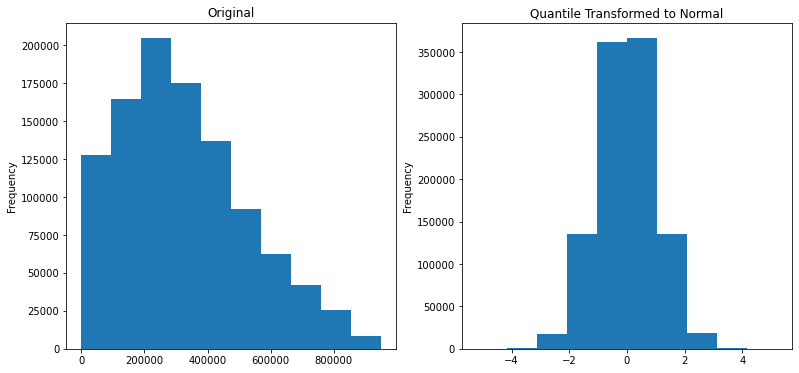

In [33]:
# 1. Create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. Fit the object
scaler.fit(train[['tax_value']])

# 3. Use the object
train['tax_value_scaled'] = scaler.transform(train[['tax_value']])


# Plot the scaled and unscaled distribution
# Oh wow! The distribution did NOT remain the same, and the scale of the x axis has changed as well.
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Quantile Transformed to Normal');

# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


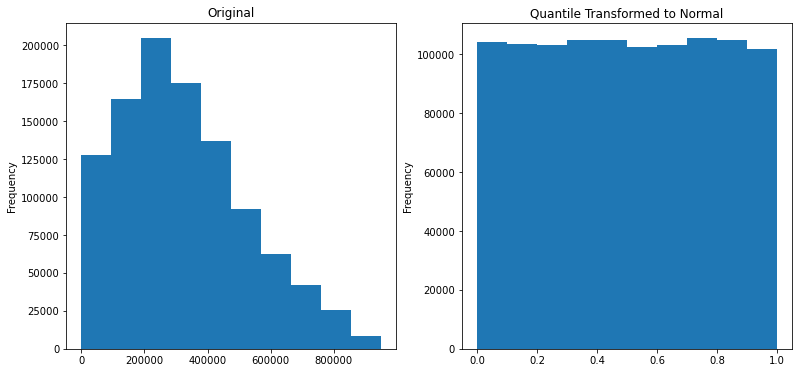

In [34]:
# 1. Create the object
scaler = sklearn.preprocessing.QuantileTransformer()

# 2. Fit the object
scaler.fit(train[['tax_value']])

# 3. Use the object
train['tax_value_scaled'] = scaler.transform(train[['tax_value']])


# Plot the scaled and unscaled distribution.
# Wow! I'm not sure what's goin on here, but I don't think this scaling would be very helpful
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Quantile Transformed to Normal');

# 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

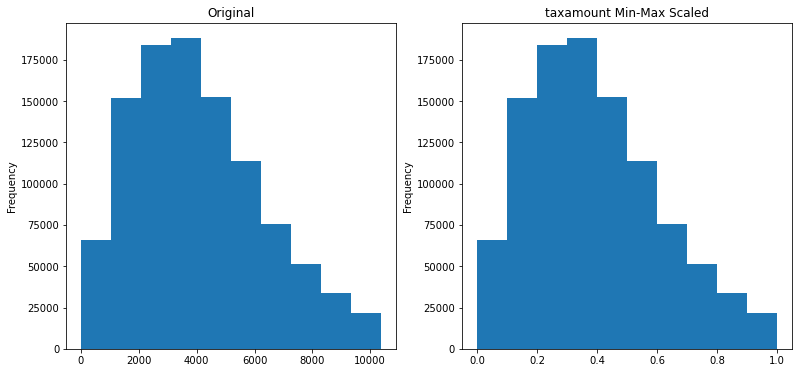

In [35]:
# I think I like min-max scaler the most, but I want to see both taxamount and tax_value one more time

# 1. Create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. Fit the object (learn the min and max value)
scaler.fit(train[['taxamount', 'tax_value']])

# 3. Use the object (use the min, max to do the transformation)
scaled_taxes = scaler.transform(train[['taxamount', 'tax_value']])

# 4. Create a dataframe from the scaled values
pd.DataFrame(scaled_taxes, index = train.index,
             columns = ['scaled_taxamount', 'scaled_tax_value'])

# 5. Assign the scaled values as new columns in the train
train[['scaled_taxamount', 'scaled_tax_value']] = scaled_taxes

# Visualize the un-scaled and scaled distribution for taxamount
# Notice that the distribution remains the same, but the scale of the x axis has changed!
plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.taxamount.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.scaled_taxamount.plot.hist(title='taxamount Min-Max Scaled');

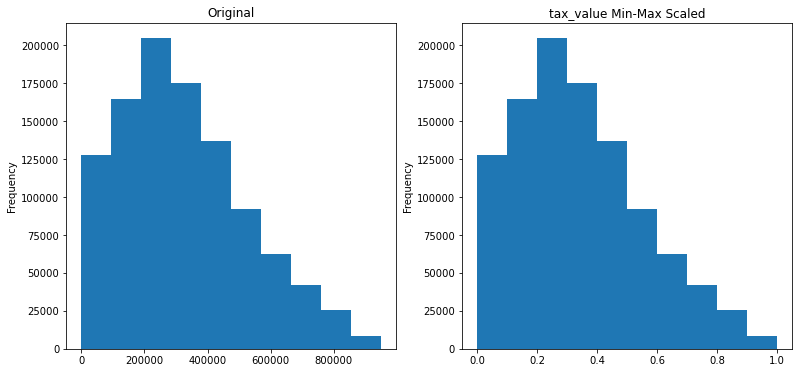

In [36]:
# Visualize the un-scaled and scaled distribution for taxvalue
# Notice that the distribution remains the same, but the scale of the x axis has changed!
plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.tax_value.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.scaled_tax_value.plot.hist(title='tax_value Min-Max Scaled');

In [41]:
def Min_Max_Scaler(train, validate, test):
    """
    Takes in the pre-split data and uses train to fit the scaler. The scaler is then applied to all dataframes and 
    the dataframes are returned in thier scaled form.
    """
    # 1. Create the object
    scaler = sklearn.preprocessing.MinMaxScaler()

    # 2. Fit the object (learn the min and max value)
    scaler.fit(train[['taxamount', 'tax_value']])

    # 3. Use the object (use the min, max to do the transformation)
    train[['taxamount', 'tax_value']] = scaler.transform(train[['taxamount', 'tax_value']])
    test[['taxamount', 'tax_value']] = scaler.transform(test[['taxamount', 'tax_value']])
    validate[['taxamount', 'tax_value']] = scaler.transform(validate[['taxamount', 'tax_value']])
    
    return train, validate, test

In [43]:
# Resetting my train by dropping the scaled columns
train = train[['bedrooms','bathrooms','area','tax_value','year_built','taxamount','fips']]
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1901200,2,2.0,1205.0,0.372953,1941,0.422635,6037
1786912,5,2.0,1586.0,0.201887,2004,0.298982,6037
930919,2,1.0,860.0,0.223268,1952,0.258308,6037
1805072,2,1.0,1125.0,0.660917,1948,0.786753,6037
1775847,3,2.5,1731.0,0.559436,2002,0.550856,6111


In [44]:
# Checking to see if it works
train, validate, test = Min_Max_Scaler(train, validate, test)

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1901200,2,2.0,1205.0,0.372953,1941,0.422635,6037
1786912,5,2.0,1586.0,0.201887,2004,0.298982,6037
930919,2,1.0,860.0,0.223268,1952,0.258308,6037
1805072,2,1.0,1125.0,0.660917,1948,0.786753,6037
1775847,3,2.5,1731.0,0.559436,2002,0.550856,6111


In [45]:
# Assigning my features to X, and target variable to y, for each split dataframe

X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

In [46]:
X_train.head()

,bedrooms,bathrooms,area,year_built,taxamount,fips
1901200,2,2.0,1205.0,1941,0.422635,6037
1786912,5,2.0,1586.0,2004,0.298982,6037
930919,2,1.0,860.0,1952,0.258308,6037
1805072,2,1.0,1125.0,1948,0.786753,6037
1775847,3,2.5,1731.0,2002,0.550856,6111


In [37]:
# Instructor Solution I don't understand: 

def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    # Create the and fit the object (learn and use the min, max to do the transformation)
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    
    # Create a dataframes from the scaled values
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled